In [1]:
import numpy as np

In [2]:
import kplr

# Tim Bedding say: Try KIC 6779699
kicnum = 6779699
kicstr = "KIC {}".format(kicnum)
client = kplr.API()
star = client.star(kicnum)

# Download the lightcurves for this KOI.
lcs = star.get_light_curves()

In [3]:
# Loop over the datasets and read in the data.
# BUG: NEED TO FILTER OUT LOW FREQUENCY SHIT HERE.
time, flux, ferr, quality = np.array([]), np.array([]), np.array([]), np.array([])
for lc in lcs:
    with lc.open() as f:
        print(lc.filename)
        # The lightcurve data are in the first FITS HDU.
        hdu_data = f[1].data
        time = np.append(time, hdu_data["time"])
        thisflux = hdu_data["sap_flux"]
        bad = np.logical_not(np.isfinite(thisflux))
        thisflux[bad] = 1.
        medflux = np.median(thisflux)
        thisflux[bad] = medflux
        flux = np.append(flux, thisflux / medflux - 1.)
        thisferr = hdu_data["sap_flux_err"] / medflux
        thisferr[bad] = np.Inf
        ferr = np.append(ferr, thisferr)
        quality = np.append(quality, hdu_data["sap_quality"])
good = np.isfinite(time) * np.isfinite(flux) * np.isfinite(ferr)
time = time[good]
flux = flux[good]
ferr = ferr[good]
quality = quality[good]

/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2009131105131_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2009166043257_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2009259160929_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2009350155506_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2010078095331_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2010174085026_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2010265121752_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2010355172524_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2011073133259_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2011177032512_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2011271113734_llc.fits
/Users/dhogg/.kplr/data/lightcurves/006779699/kplr006779699-2012004120508_llc.fits
/Use

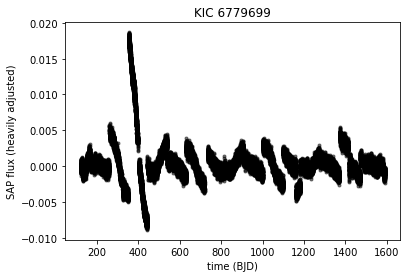

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.clf()
plt.plot(time, flux, "k.", alpha=0.5)
plt.xlabel("time (BJD)")
plt.ylabel("SAP flux (heavily adjusted)")
plt.title(kicstr)

In [5]:
from astropy.stats import LombScargle
frequency, power = LombScargle(time, flux).autopower()
print(frequency, power)

[  6.80058231e-05   2.04017469e-04   3.40029116e-04 ...,   1.12030685e+02
   1.12030821e+02   1.12030957e+02] [  1.29824300e-02   1.34633327e-02   1.44031605e-02 ...,   5.06421204e-07
   4.01165795e-07   2.79830829e-07]


(0.0, 0.02)

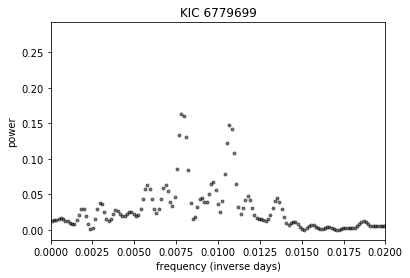

In [6]:
# Why does this plot look like crap?
plt.clf()
plt.plot(frequency, power, "k.", alpha=0.5)
plt.xlabel("frequency (inverse days)")
plt.ylabel("power")
plt.title(kicstr)
plt.xlim(0., 0.02)

In [7]:
fmax = frequency[np.argmax(power * (frequency < 0.02))]
omega = 2. * np.pi * fmax
fmax, omega
fmax = frequency[np.argmax(power * (frequency < 0.02) * (frequency > 0.009))]
omegas = (omega, 2. * np.pi * fmax)
omegas

(0.049138716680269992, 0.067085030598281636)